# Creating Philippine Regional Geospatial Data

## Libraries
Several libraries are required to perform a thorough analysis of the dataset. Each of these libraries will be imported and described below:
* `pandas` contains a large collection of mathematical functions
* `numpy` contains functions that are designed for data manipulation and data analysis
* `geopandas` contains functionalities that make operations easier on spatial database 
* `matplotlib.pyplot` contains functions to create interactive plots
* `shapely.geometry` contain functions that allow the modification and inspection of geometric objections.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

import plotly.express as px


%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Importing GADM Provincial Data

In [2]:
gadm = gpd.read_file('data/gadm41/gadm41_PHL_1.shp')
print(gadm.shape)
gadm.head()

(81, 12)


,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,PHL.1_1,PHL,Philippines,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,"POLYGON ((120.74773 17.15755, 120.73747 17.156..."
1,PHL.2_1,PHL,Philippines,Agusan del Norte,NA,NA,Lalawigan,Province,1602,PH.AN,PH-AGN,"POLYGON ((125.51141 8.70021, 125.49689 8.70089..."
2,PHL.3_1,PHL,Philippines,Agusan del Sur,NA,NA,Lalawigan,Province,1603,PH.AS,PH-AGS,"POLYGON ((126.05209 7.93625, 126.04572 7.93504..."
3,PHL.4_1,PHL,Philippines,Aklan,NA,NA,Lalawigan,Province,604,PH.AK,PH-AKL,"MULTIPOLYGON (((122.28702 11.74581, 122.28805 ..."
4,PHL.5_1,PHL,Philippines,Albay,NA,NA,Lalawigan,Province,505,PH.AL,PH-ALB,"MULTIPOLYGON (((123.44640 13.02776, 123.44541 ..."


In [3]:
gadm.NAME_1

0                    Abra
1        Agusan del Norte
2          Agusan del Sur
3                   Aklan
4                   Albay
             ...         
76              Tawi-Tawi
77               Zambales
78    Zamboanga del Norte
79      Zamboanga del Sur
80      Zamboanga Sibugay
Name: NAME_1, Length: 81, dtype: object

## Importing a Dataset with Philippine Provinces with their Region data

In [4]:
region_prov = pd.read_csv('data/prov_region.csv')
region_prov.head()

,province,capital,region
0,Abra,Bangued,CAR
1,Agusan del Norte,Cabadbaran,Region XIII
2,Agusan del Sur,Prosperidad,Region XIII
3,Aklan,Kalibo,Region VI
4,Albay,Legazpi,Region V


## Merging the GADM and Province-Region Data

In [5]:
gadm_region = gadm.merge(region_prov, left_on='NAME_1', right_on='province', how='left')
gadm_region.head()

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
0,PHL.1_1,PHL,Philippines,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,"POLYGON ((120.74773 17.15755, 120.73747 17.156...",Abra,Bangued,CAR
1,PHL.2_1,PHL,Philippines,Agusan del Norte,NA,NA,Lalawigan,Province,1602,PH.AN,PH-AGN,"POLYGON ((125.51141 8.70021, 125.49689 8.70089...",Agusan del Norte,Cabadbaran,Region XIII
2,PHL.3_1,PHL,Philippines,Agusan del Sur,NA,NA,Lalawigan,Province,1603,PH.AS,PH-AGS,"POLYGON ((126.05209 7.93625, 126.04572 7.93504...",Agusan del Sur,Prosperidad,Region XIII
3,PHL.4_1,PHL,Philippines,Aklan,NA,NA,Lalawigan,Province,604,PH.AK,PH-AKL,"MULTIPOLYGON (((122.28702 11.74581, 122.28805 ...",Aklan,Kalibo,Region VI
4,PHL.5_1,PHL,Philippines,Albay,NA,NA,Lalawigan,Province,505,PH.AL,PH-ALB,"MULTIPOLYGON (((123.44640 13.02776, 123.44541 ...",Albay,Legazpi,Region V


## Data Cleaning the Merged datasets

### Checking for null values in Region column

In [6]:
# Checking the unique values under the region column
gadm_region.region.unique()

array(['CAR', 'Region XIII', 'Region VI', 'Region V', 'Region III',
       'BARMM', 'Region II', 'Region IV-A', 'Region VIII', 'Region VII',
       'Region X', nan, 'Region XI', 'Region I', 'Region IV-B',
       'Region XII', 'Region IX'], dtype=object)

In [7]:
# Checking the rows with nan values in region column
gadm_region[gadm_region['region'].isna()]

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
25,PHL.26_1,PHL,Philippines,Compostela Valley,NA,NA,Lalawigan,Province,1182,PH.CL,NA,"MULTIPOLYGON (((125.99659 7.11321, 125.99123 7...",NaN,NaN,NaN
43,PHL.44_1,PHL,Philippines,Maguindanao,NA,NA,Lalawigan,Province,1538,PH.MG,PH-MAG,"MULTIPOLYGON (((124.35421 6.72364, 124.28252 6...",NaN,NaN,NaN
46,PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,"MULTIPOLYGON (((120.99390 14.41171, 120.99400 ...",NaN,NaN,NaN
52,PHL.53_1,PHL,Philippines,North Cotabato,NA,NA,Lalawigan,Province,1247,PH.NC,NA,"POLYGON ((124.97336 6.73641, 124.97292 6.73792...",NaN,NaN,NaN


#### Finding the region for North Cotabato

In [8]:
# Search if there is nSouth Cotabato and copy its region value
gadm_region[gadm_region['NAME_1'] == 'South Cotabato']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
69,PHL.70_1,PHL,Philippines,South Cotabato,NA,NA,Lalawigan,Province,1263,PH.SC,PH-SCO,"POLYGON ((125.23561 6.12256, 125.23441 6.11934...",South Cotabato,Koronadal,Region XII


In [9]:
gadm_region.loc[gadm_region['NAME_1'] == 'North Cotabato','region'] = 'Region XII'
gadm_region[gadm_region['NAME_1'] == 'North Cotabato'].region

52    Region XII
Name: region, dtype: object

In [10]:
gadm_region.loc[gadm_region['NAME_1'] == 'North Cotabato',['province', 'capital']] = 'North Cotabato', 'Kidapawan'
gadm_region[gadm_region['NAME_1'] == 'North Cotabato']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
52,PHL.53_1,PHL,Philippines,North Cotabato,NA,NA,Lalawigan,Province,1247,PH.NC,NA,"POLYGON ((124.97336 6.73641, 124.97292 6.73792...",North Cotabato,Kidapawan,Region XII


#### Finding the region for Compostela Valley

In [11]:
# Check if there is Davao de Oro in the data. If none, we can replace its region value to Region XI given that Compostela Valley or Davao de Oro is part of the Davao region.
gadm_region[gadm_region['region'] == 'Region XI']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
26,PHL.27_1,PHL,Philippines,Davao del Norte,Davao,NA,Lalawigan,Province,1123,PH.DV,PH-DAV,"MULTIPOLYGON (((125.72403 6.91986, 125.72347 6...",Davao del Norte,Tagum,Region XI
27,PHL.28_1,PHL,Philippines,Davao del Sur,NA,NA,Lalawigan,Province,1124,PH.DS,PH-DAS,"MULTIPOLYGON (((125.48917 5.42806, 125.48917 5...",Davao del Sur,Digos,Region XI
28,PHL.29_1,PHL,Philippines,Davao Oriental,NA,NA,Lalawigan,Province,1125,PH.DO,PH-DAO,"MULTIPOLYGON (((126.19121 6.27074, 126.19085 6...",Davao Oriental,Mati,Region XI


In [12]:
gadm_region.loc[gadm_region['NAME_1'] == 'Compostela Valley','region'] = 'Region XI'
gadm_region[gadm_region['NAME_1'] == 'Compostela Valley']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
25,PHL.26_1,PHL,Philippines,Compostela Valley,NA,NA,Lalawigan,Province,1182,PH.CL,NA,"MULTIPOLYGON (((125.99659 7.11321, 125.99123 7...",NaN,NaN,Region XI


In [13]:
gadm_region.loc[gadm_region['NAME_1'] == 'Compostela Valley',['province', 'capital']] = 'Compostela Valley', 'Nabunturan'
gadm_region[gadm_region['NAME_1'] == 'Compostela Valley']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
25,PHL.26_1,PHL,Philippines,Compostela Valley,NA,NA,Lalawigan,Province,1182,PH.CL,NA,"MULTIPOLYGON (((125.99659 7.11321, 125.99123 7...",Compostela Valley,Nabunturan,Region XI


#### Finding the region for Maguindanao

In [ ]:
# Maguindanao is in BARMM
gadm_region.loc[gadm_region['NAME_1'] == 'Maguindanao','region'] = 'BARMM'
gadm_region[gadm_region['NAME_1'] == 'Maguindanao']

In [14]:
gadm_region.loc[gadm_region['NAME_1'] == 'Maguindanao',['province', 'capital']] = 'Maguindanao', 'Shariff Aguak'
gadm_region[gadm_region['NAME_1'] == 'Maguindanao']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
43,PHL.44_1,PHL,Philippines,Maguindanao,NA,NA,Lalawigan,Province,1538,PH.MG,PH-MAG,"MULTIPOLYGON (((124.35421 6.72364, 124.28252 6...",Maguindanao,Shariff Aguak,NaN


#### Finding the region for Metropolitan Manila

In [15]:
# Metropolitan Manila had problems in consistency in naming. WE just put 'NCR' under its region column
gadm_region.loc[gadm_region['NAME_1'] == 'Metropolitan Manila','region'] = 'NCR'
gadm_region[gadm_region['NAME_1'] == 'Metropolitan Manila']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
46,PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,"MULTIPOLYGON (((120.99390 14.41171, 120.99400 ...",NaN,NaN,NCR


In [16]:
gadm_region.loc[gadm_region['NAME_1'] == 'Metropolitan Manila',['province', 'capital']] = 'Metropolitan Manila', 'Manila'
gadm_region[gadm_region['NAME_1'] == 'Metropolitan Manila']

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry,province,capital,region
46,PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,"MULTIPOLYGON (((120.99390 14.41171, 120.99400 ...",Metropolitan Manila,Manila,NCR


In [17]:
# Now that we have replaced the values of the rows with NaN values, 
# let us now check if there are still rows left with nan region values
gadm_region.isna().any(axis=0)

GID_1        False
GID_0        False
COUNTRY      False
NAME_1       False
VARNAME_1    False
NL_NAME_1    False
TYPE_1       False
ENGTYPE_1    False
CC_1         False
HASC_1       False
ISO_1        False
geometry     False
province     False
capital      False
region        True
dtype: bool

Now, that we can see that there are no more NaN values in any rows, let's proceed to checking for row duplicates.

### Checking for duplicated rows

In [18]:
gadm_region.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

Now, that we can see that there are no duplicated rows, let's proceed to the next step of creating the geospatial data.

## Dissolve Merged Data

### Dissolve by `region`: Regional Geospatial Data

In [19]:
# Dissolving the geospatial data by region
gadm_regional_dissolved = gadm_region.dissolve(by='region')

print('Shape: '+ str(gadm_regional_dissolved.shape))
gadm_regional_dissolved

Shape: (17, 14)


,geometry,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,province,capital
region,,,,,,,,,,,,,,
BARMM,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4...",PHL.9_1,PHL,Philippines,Basilan,NA,NA,Lalawigan,Province,1507,PH.BS,PH-BAS,Basilan,Isabela
CAR,"POLYGON ((120.61117 16.20461, 120.60331 16.207...",PHL.1_1,PHL,Philippines,Abra,NA,NA,Lalawigan,Province,1401,PH.AB,PH-ABR,Abra,Bangued
NCR,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ...",PHL.47_1,PHL,Philippines,Metropolitan Manila,NA,NA,Lalawigan,Province,1339,PH.MM,NA,Metropolitan Manila,Manila
Region I,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ...",PHL.34_1,PHL,Philippines,Ilocos Norte,NA,NA,Lalawigan,Province,128,PH.IN,PH-ILN,Ilocos Norte,Laoag
Region II,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ...",PHL.11_1,PHL,Philippines,Batanes,NA,NA,Lalawigan,Province,209,PH.BN,PH-BTN,Batanes,Basco
Region III,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ...",PHL.8_1,PHL,Philippines,Aurora,NA,NA,Lalawigan,Province,377,PH.AU,PH-AUR,Aurora,Baler
Region IV-A,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ...",PHL.12_1,PHL,Philippines,Batangas,NA,NA,Lalawigan,Province,410,PH.BT,PH-BTG,Batangas,Batangas City
Region IV-B,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7...",PHL.45_1,PHL,Philippines,Marinduque,NA,NA,Lalawigan,Province,1740,PH.MQ,PH-MAD,Marinduque,Boac
Region IX,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6...",PHL.79_1,PHL,Philippines,Zamboanga del Norte,NA,NA,Lalawigan,Province,972,PH.ZN,PH-ZAN,Zamboanga del Norte,Dipolog


In [20]:
# Only getting the region and geometry data
regional = gadm_regional_dissolved[['geometry']].reset_index()

# Renaming the 'COUNTRY' to 'Geolocation' for merging regional and national geospatial later
regional.rename(columns = {'region':'geolocation'}, inplace = True)

# Check if all Philippine Regions are here
regional  

,geolocation,geometry
0,BARMM,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
1,CAR,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,NCR,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
3,Region I,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
4,Region II,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
5,Region III,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
6,Region IV-A,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
7,Region IV-B,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
8,Region IX,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."
9,Region V,"MULTIPOLYGON (((122.98556 11.71361, 122.98500 ..."


<Axes: >

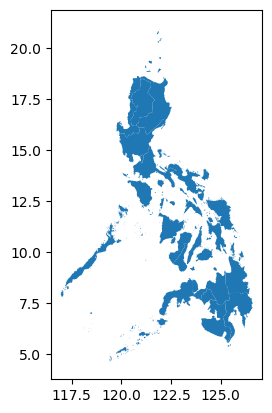

In [21]:
regional.plot()

## Setting Geolocation Naming Format 

In [26]:
geolocation_names = ['BARMM: Bangsamoro Autonomous Region in Muslim Mindanao',
                     'CAR: Cordillera Administrative Region', 
                     'NCR: National Capital Region', 
                     'Region 1: Ilocos Region',
                     'Region 2: Cagayan Valley', 
                     'Region 3: Central Luzon', 
                     'Region 4A: CALABARZON', 
                     'MIMAROPA: Southwestern Tagalog Region', 
                     'Region 9: Zamboanga Peninsula',
                     'Region 5: Bicol Region', 
                     'Region 6: Western Visayas', 
                     'Region 7: Central Visayas', 
                     'Region 8: Eastern Visayas',  
                     'Region 10: Northern Mindanao', 
                     'Region 11: Davao Region', 
                     'Region 12: SOCCSKSARGEN', 
                     'CARAGA: CARAGA Administrative Region']

regional['geolocation'] = geolocation_names
regional.set_index('geolocation')
regional = regional.reset_index(drop=True)
regional

,geolocation,geometry
0,BARMM: Bangsamoro Autonomous Region in Muslim ...,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."
1,CAR: Cordillera Administrative Region,"POLYGON ((120.61117 16.20461, 120.60331 16.207..."
2,NCR: National Capital Region,"MULTIPOLYGON (((120.97872 14.49007, 120.97869 ..."
3,Region 1: Ilocos Region,"MULTIPOLYGON (((119.86672 15.81368, 119.86665 ..."
4,Region 2: Cagayan Valley,"MULTIPOLYGON (((121.19802 15.90807, 121.19567 ..."
5,Region 3: Central Luzon,"MULTIPOLYGON (((120.08514 14.75223, 120.08528 ..."
6,Region 4A: CALABARZON,"MULTIPOLYGON (((121.09695 13.53861, 121.09666 ..."
7,MIMAROPA: Southwestern Tagalog Region,"MULTIPOLYGON (((117.31028 7.50722, 117.30917 7..."
8,Region 9: Zamboanga Peninsula,"MULTIPOLYGON (((122.06306 6.86417, 122.06223 6..."
9,Region 5: Bicol Region,"MULTIPOLYGON (((122.98556 11.71361, 122.98500 ..."


In [27]:
# Rechecking the Geolocation of BARMM 
regional[regional['geolocation'] == 'BARMM: Bangsamoro Autonomous Region in Muslim ...' ]

,geolocation,geometry


In [28]:
regional[regional['geolocation'] =='BARMM: Bangsamoro Autonomous Region in Muslim Mindanao' ]

,geolocation,geometry
0,BARMM: Bangsamoro Autonomous Region in Muslim ...,"MULTIPOLYGON (((119.47083 4.59083, 119.47083 4..."


In [29]:
# now we can save the regional geospatial data in a csv file
regional.to_csv('data/regional_geospatial.csv', index=False)


In [30]:
regional.dtypes

geolocation      object
geometry       geometry
dtype: object

In [31]:
#need to convert the geometry column to string to be able to save it in a csv file
regional['geometry'] = regional['geometry'].astype(str)
regional.dtypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_10664\3343064117.py:2: UserWarning: Geometry column does not contain geometry.
  regional['geometry'] = regional['geometry'].astype(str)


geolocation    object
geometry       object
dtype: object

In [32]:
#save to csv
regional.to_csv('data/regional_geospatial.csv', index=False)